# Digital Humanities 140 Final Project
> This is the blog for my DH140 final project.

- toc:true
- branch: master
- badges: true
- comments: true
- author: Hamel Husain & Jeremy Howard
- categories: [fastpages, jupyter]

# **Introduction**
## **Ariel A. Widjaja**
I am a fourth year Communication major, Digital Humanities minor at UCLA. 

Date: 17 March 2022

## **Project**
For this project, I would like to analyze which genres of video games have the highest number in sales and play time. The video game industry started with Pong, a table tennis–themed arcade game. Video games have since grown in popularity, to the point where a population of people have made video games their livelihood. I was raised in an environment where video games were prominent (although had limited access), so I grew up taking fancy in the field. 

There is also [an article](https://medium.com/analytics-vidhya/a-data-driven-exploration-of-video-games-sales-and-scores-3c77f1c6573c) which asks the same question about video games, but analyzes sales and ratings. The author relates video game sales and their relations to genre, platform, and ratings among users and critics. Unfortunately, the dataset used for this project is somewhat limited due to the range of time it covers (video games were just starting out).

With the analyses in this project, I hope to find out which genres are "ideal" for both producers and consumers with the question: "which genres of video games are the best options for consumers and producers, based on play time and used price?" 

It is important to note that the dataset used for this project spans from 2004 up to 2008, so the results of the data analysis may not be relevant/applicable to this day.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression

In [2]:
import video_games
df = pd.read_csv('video_games.csv')

# **Methods**

The dataset used for this was taken from The Collection of Really Great, Interesting, Situated Datasets (CORGIS). Here is the [link](https://corgis-edu.github.io/corgis/csv/video_games/) to the dataset specific to this project.

This dataset contains data regarding video games from 2004 to 2008, which include review score, sales, used price, release year, etc. However, for the purpose of this project, I will focus on used price and genres. To simplify the process, I have generated graphs that display the data in a more organized manner. This will then ease the process of analysis and making conclusions. There will be further elaborations either before or after each graph.

Here is a summary of statistics for the video game dataset used for this project:

In [3]:
df.describe()

,Features.Max Players,Metrics.Review Score,Metrics.Sales,Metrics.Used Price,Release.Year,Length.All PlayStyles.Average,Length.All PlayStyles.Leisure,Length.All PlayStyles.Median,Length.All PlayStyles.Polled,Length.All PlayStyles.Rushed,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
count,1212.000000,1212.000000,1212.00000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,1.658416,68.828383,0.50316,17.393894,2006.820132,13.653177,26.250426,11.225371,44.415842,9.396163,...,12.731491,18.866048,12.103548,13.995875,10.319788,8.465952,11.051966,8.280941,24.882838,6.974697
std,1.204377,12.956266,1.06985,5.018972,1.050653,19.397156,51.598941,13.493717,154.837893,11.176371,...,23.979610,42.917021,23.355374,57.333257,20.895117,9.691745,14.092617,9.502600,87.382770,7.964522
min,1.000000,19.000000,0.01000,4.950000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,60.000000,0.09000,14.950000,2006.000000,3.562500,4.000000,3.025000,1.000000,2.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,70.000000,0.21000,17.950000,2007.000000,8.858333,12.000000,8.000000,6.000000,6.708333,...,7.291667,8.000000,7.000000,1.000000,6.283333,6.575000,8.000000,6.041667,3.000000,5.341667
75%,2.000000,79.000000,0.46000,17.950000,2008.000000,16.033333,27.600000,13.783333,25.000000,11.366667,...,16.112500,21.033333,15.000000,7.000000,12.941667,11.033333,14.508333,10.533333,14.000000,9.312500
max,8.000000,98.000000,14.66000,49.950000,2008.000000,279.733333,476.266667,126.000000,2300.000000,120.200000,...,291.000000,478.933333,291.000000,1100.000000,291.000000,72.383333,135.583333,70.000000,1100.000000,70.000000


The brief summary of statistics shows numerical data in relation to their corresponding categories. 
Several data to be noted are that the length of play time, either leisurely, rushed, or everything else, all have a minimum of 0. This can mean that the games were purchased but not played at all. In addition, the standard deviation for play time data vary, showing that the difference in play time differs depending on the play style (casual, rushed, story only, completionist, etc.) Although some may consider this data as outliers, they are valid data as it still shows the amount of time spent on the game, in which case is nonexistent (zero).

All of the maximum play time in this data set is far above the average play time, which implies that there were dedicated players that spend significantly more time on the game. In addition, the average price for all the used games is 17 dollars, yet the maximum reaches near 50 dollars, which can mean that some games were very high in demand.

Here are some plots to show the range of the play time and used price:

In [30]:
#To make comma separated values SEPARATED
df = df.assign(genre_categories=df['Metadata.Genres'].str.split(',')).explode('genre_categories')

<AxesSubplot:>

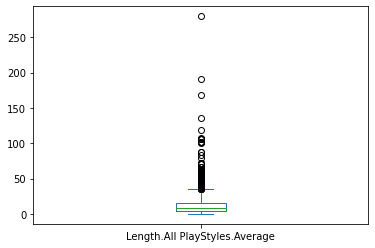

In [4]:
#Plot for average play time, all styles (leisure, rushed, completionist, main story only, etc.)
df.sort_values(by='Length.All PlayStyles.Average',ascending=True).plot(kind='box',
             y='Length.All PlayStyles.Average')

<AxesSubplot:>

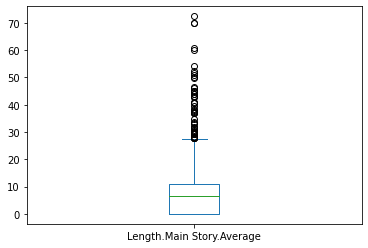

In [5]:
#Plot for average play time, main story only
df.sort_values(by='Length.Main Story.Average',ascending=True).plot(kind='box',
             y='Length.Main Story.Average')

<AxesSubplot:>

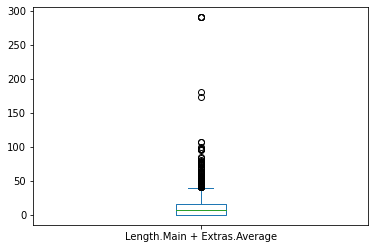

In [6]:
#Plot for average play time, main story and side quests
df.sort_values(by='Length.Main + Extras.Average',ascending=True).plot(kind='box',
             y='Length.Main + Extras.Average')

<AxesSubplot:>

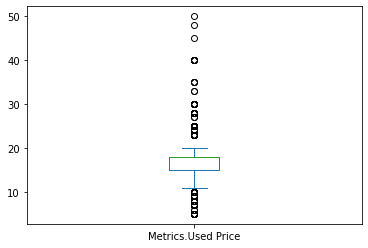

In [7]:
#Plot for used price
df.sort_values(by='Metrics.Used Price',ascending=True).plot(kind='box',
             y='Metrics.Used Price')

In [8]:
#to see which columns have higher correlation
corr_matrix = df.corr()

## **Results**

To have a more comprehensive look at the dataset, below is a heatmap of a matrix used to highlight which columns in the dataframe have higher correlation with one another. The lighter the box's color, the higher the correlation. In addition, there is also the numeric value of the correlation on each of the boxes.

<AxesSubplot:>

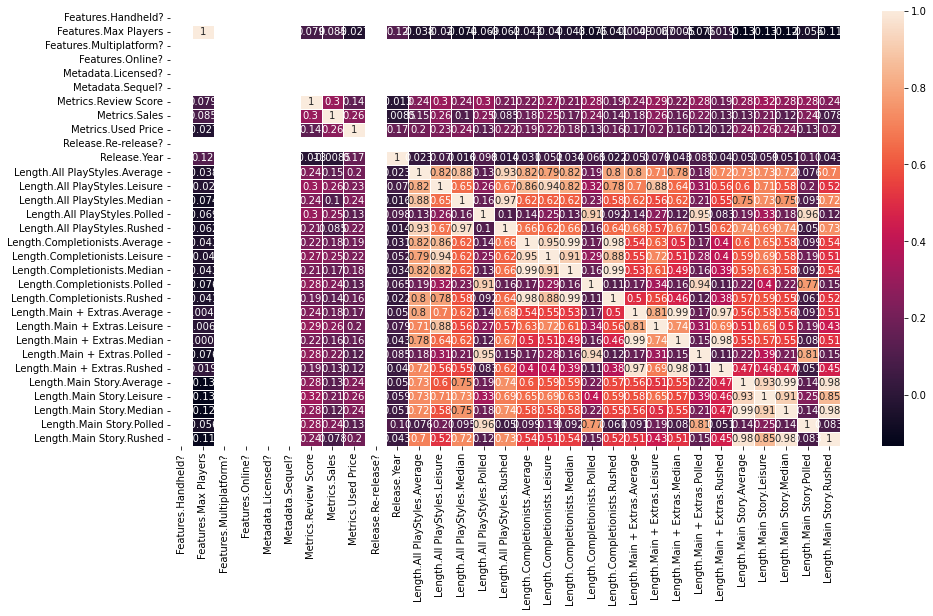

In [9]:
plt.figure(figsize = (15,8))
sn.heatmap(corr_matrix, annot=True, linewidths=.5)

With this heatmap, it is easier to see which columns are more related, and which are not. For example, it is very evident that the amount of maximum players is barely related to any of the other columns just by looking at the color, but also the numbers. To have a proper analysis, the boxes that are the lightest and have the number "1" will be disregarded, as they are the correlation of a column to itself.

"Object" valued columns (words or a true/false value), such as the games' genres, publishers, whether they are licensed or not, etc. cannot be shown on a matrix. What can be observed, however, are the correlations between review scores, sales, used prices, and play time, as these are numerical data. It is interesting to see that most of the average and median length of play time are extremely correlated to rushed play styles. This can mean that most players rush through the games (not playing leisurely) in this dataset. 

Here is a bit of statistical coding to show how correlated the average length of play time to the average length of rushed play styles:

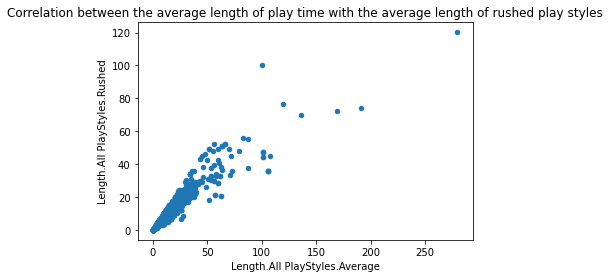

In [10]:
df.plot(kind='scatter',
        x='Length.All PlayStyles.Average',
        y='Length.All PlayStyles.Rushed',
        title='Correlation between the average length of play time with the average length of rushed play styles');

In [11]:
X_new = df[['Length.All PlayStyles.Average']].values.reshape(-1,1)
y= df[['Length.All PlayStyles.Rushed']]

In [12]:
reg = LinearRegression().fit(X_new, y)

In [13]:
reg.coef_

array([[0.53534603]])

In [14]:
ytrain = reg.intercept_ + reg.coef_ * X_new

Here is one with a line, just to make it more clear.

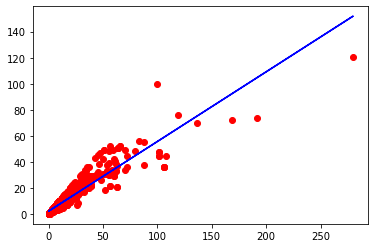

In [15]:
plt.plot(X_new,y,'ro',X_new,ytrain,'b-');

Here are some graphs that show how unrelated the least correlated columns are:

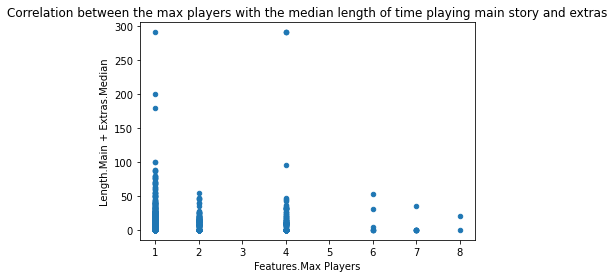

In [16]:
df.plot(kind='scatter',
        x='Features.Max Players',
        y='Length.Main + Extras.Median',
        title='Correlation between the max players with the median length of time playing main story and extras');

In [17]:
X_new = df[['Features.Max Players']].values.reshape(-1,1)
y= df[['Length.Main + Extras.Median']]

In [18]:
reg = LinearRegression().fit(X_new, y)

In [19]:
reg.coef_

array([[0.00973602]])

In [20]:
ytrain = reg.intercept_ + reg.coef_ * X_new

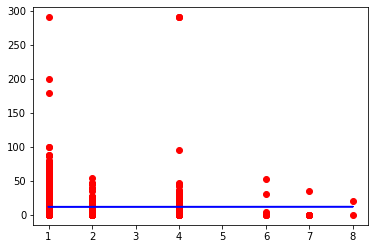

In [21]:
plt.plot(X_new,y,'ro',X_new,ytrain,'b-');

Back to the topic. To take a closer look at why the average length of play time to the average length of rushed play styles are so correlated as shown, the following graph is generated to show the genres in this dataset along with their respective average play time.

<AxesSubplot:title={'center':'Average Length of Time Played'}, xlabel='genre_categories'>

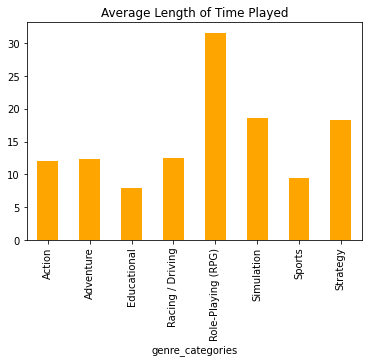

In [52]:
#This shows groups the genres' content count instead of showing individual cases, although there are some overlap 
df.groupby('genre_categories')['Length.All PlayStyles.Average'].mean().plot(kind='bar', color='orange', title='Average Length of Time Played')

Without a doubt, the role-playing game (RPG) genre takes the lead, with simulation and strategy competing for second place. To elaborate, RPGs are games where players assume the roles of characters in a fictional setting, which include a plot. Players then are responsible for making decisions to progress the story.

At this point of analysis, one of the most probable reasons why the players in this dataset rushed the game is because there is a story element in the games. It is no surprise that the games' enthusiasts would not like to be spoiled by their fellow gamers. Another probable reason is that players may tend to attempt finishing story-driven games in one or a few sessions, given that there is a story and they might lose track of their progress if they were to stop for too long.

The following graph shows the genres along with their average resale price (used games):

<AxesSubplot:title={'center':'Length of Time Played Rushed Based on Genre'}, xlabel='genre_categories'>

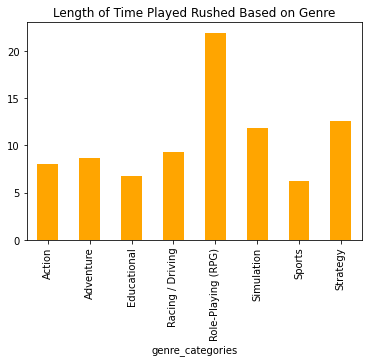

In [53]:
#This shows groups the genres' content count instead of showing individual cases, although there are some overlap 
df.groupby('genre_categories')['Length.All PlayStyles.Rushed'].mean().plot(kind='bar', color='orange', title='Length of Time Played Rushed Based on Genre')

<AxesSubplot:title={'center':'Average Used Price'}, ylabel='genre_categories'>

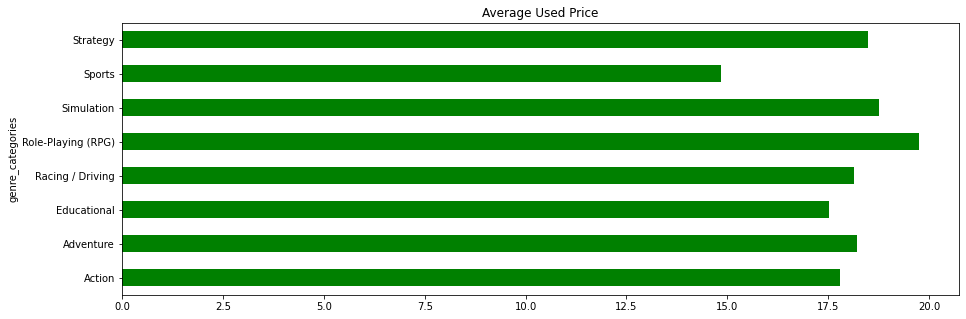

In [55]:
df.groupby('genre_categories')['Metrics.Used Price'].mean().plot(kind='barh', figsize=(15,5), color='green', title='Average Used Price')

## **Discussion**
 (what does your analysis show, what is the big picture, and how are these findings useful?)